8700
Epoch: 1, Loss: 0.05585, Acc: 20199074.0000
Epoch: 2, Loss: 0.05373, Acc: 20199074.0000
Epoch: 3, Loss: 0.05236, Acc: 20199074.0000
Epoch: 4, Loss: 0.05113, Acc: 20199074.0000
Epoch: 5, Loss: 0.04972, Acc: 20199074.0000
Epoch: 6, Loss: 0.04838, Acc: 20199074.0000
Epoch: 7, Loss: 0.04675, Acc: 20199074.0000
Epoch: 8, Loss: 0.04586, Acc: 20199074.0000
Epoch: 9, Loss: 0.04461, Acc: 20199074.0000
Epoch: 10, Loss: 0.04346, Acc: 20199074.0000
Epoch: 11, Loss: 0.04213, Acc: 20199074.0000
Epoch: 12, Loss: 0.04059, Acc: 20199074.0000
Epoch: 13, Loss: 0.03898, Acc: 20199074.0000
Epoch: 14, Loss: 0.03722, Acc: 20199074.0000
Epoch: 15, Loss: 0.03567, Acc: 20199074.0000
Epoch: 16, Loss: 0.03401, Acc: 20199074.0000
Epoch: 17, Loss: 0.03380, Acc: 20199074.0000
Epoch: 18, Loss: 0.03381, Acc: 20199074.0000
Epoch: 19, Loss: 0.03163, Acc: 20199074.0000
Epoch: 20, Loss: 0.03110, Acc: 20199074.0000
Epoch: 21, Loss: 0.02983, Acc: 20199074.0000
Epoch: 22, Loss: 0.02996, Acc: 20199074.0000
Epoch: 23, Los

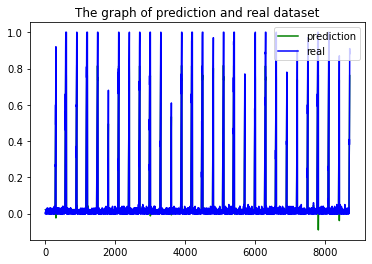

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch


data_list = list()

for i in range (1,30):
    with open (f'../datafile/datafile{i}.txt') as _f:
        data = _f.read().split('\n')
        _d = data[1:-1]
    
    data_list.extend(_d)

final_list = list()
for i in range (int(len(data_list)/100)):
    _d = data_list[100*(i-1) : 100*i]
    loss_packets = len([_data for _data in _d if _data == 'None'])
    final_list.append(loss_packets)
final_list = np.array(final_list)
print(len(final_list))


dataset = final_list.astype(np.float32)
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value - min_value
dataset = list(map(lambda x: x / scalar, dataset))

def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# 创建好输入输出
data_X, data_Y = create_dataset(dataset)

# 划分训练集和测试集，70% 作为训练集
train_size = int(len(data_X) * 0.8)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

train_X = train_X.reshape(-1, 1, 2)
train_Y = train_Y.reshape(-1, 1, 1)
test_X = test_X.reshape(-1, 1, 2)

train_x = torch.from_numpy(train_X)
train_y = torch.from_numpy(train_Y)

from torch import nn
from torch.autograd import Variable

class lstm(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,num_layer):
        super(lstm,self).__init__()
        self.layer1 = nn.LSTM(input_size,hidden_size,num_layer)
        self.dropout = nn.Dropout(0.5)
        self.layer2 = nn.Linear(hidden_size,output_size)
    
    def forward(self,x):
        x,_ = self.layer1(x)
        x = self.dropout(x)
        s,b,h = x.size()
        x = x.view(s*b,h)
        x = self.layer2(x)
        x = x.view(s,b,-1)
        return x

model = lstm(2,4,1,2)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# 开始训练
for e in range(10000):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
    # 前向传播
    out = model(var_x)
    loss = criterion(out, var_y)
    pred = out.argmax(dim=1)

    num_correct = 1
    num_correct = torch.eq(pred, var_y).sum()
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 1 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}, Acc: {:.4f}'.format(e + 1, loss.item(),num_correct.item()))
    
model = model.eval() # 转换成测试模式

data_X = data_X.reshape(-1, 1, 2)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = model(var_data) # 测试集的预测结果
# 改变输出的格式
pred_test = pred_test.view(-1).data.numpy()
# 画出实际结果和预测的结果
plt.plot(pred_test, 'g', label='prediction')
plt.plot(dataset, 'b', label='real')
plt.legend(loc='best')
plt.title('The graph of prediction and real dataset')
plt.show()



In [5]:
len(pred_test)


8698

In [4]:
len(dataset)

8700